# Teoria de Señales  2024-1
## Edward Fabian Goyeneche Velandia -Ingenieria Electronica.
### Universidad Nacional de Colombia - Sede Manizales.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.neural_network import MLPRegressor 
from scipy. signal import welch


### Señal  Original  $\frac{1}{3}$

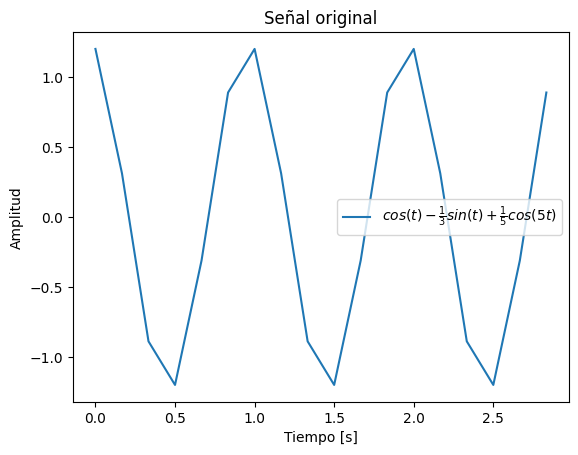

In [2]:
import numpy as np

# Generar la señal original
def generate_original_signal(w, t):
    signal = np.cos(w * t) - (1/3) * np.sin(w * t) + (1/5) * np.cos(5 * w * t)
    return signal

fs = 6
T = 3
w = 2 * np.pi
t = np.linspace(0, T, int(fs * T), endpoint=False)

original_signal = generate_original_signal(w, t)


plt.plot(t, original_signal)
plt.title("Señal original")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend(["$cos(t) - \\frac{1}{3}sin(t) + \\frac{1}{5}cos(5t)$"])
plt.show()



### Matriz de la señal con distinto Ruido Blanco Gaussiano

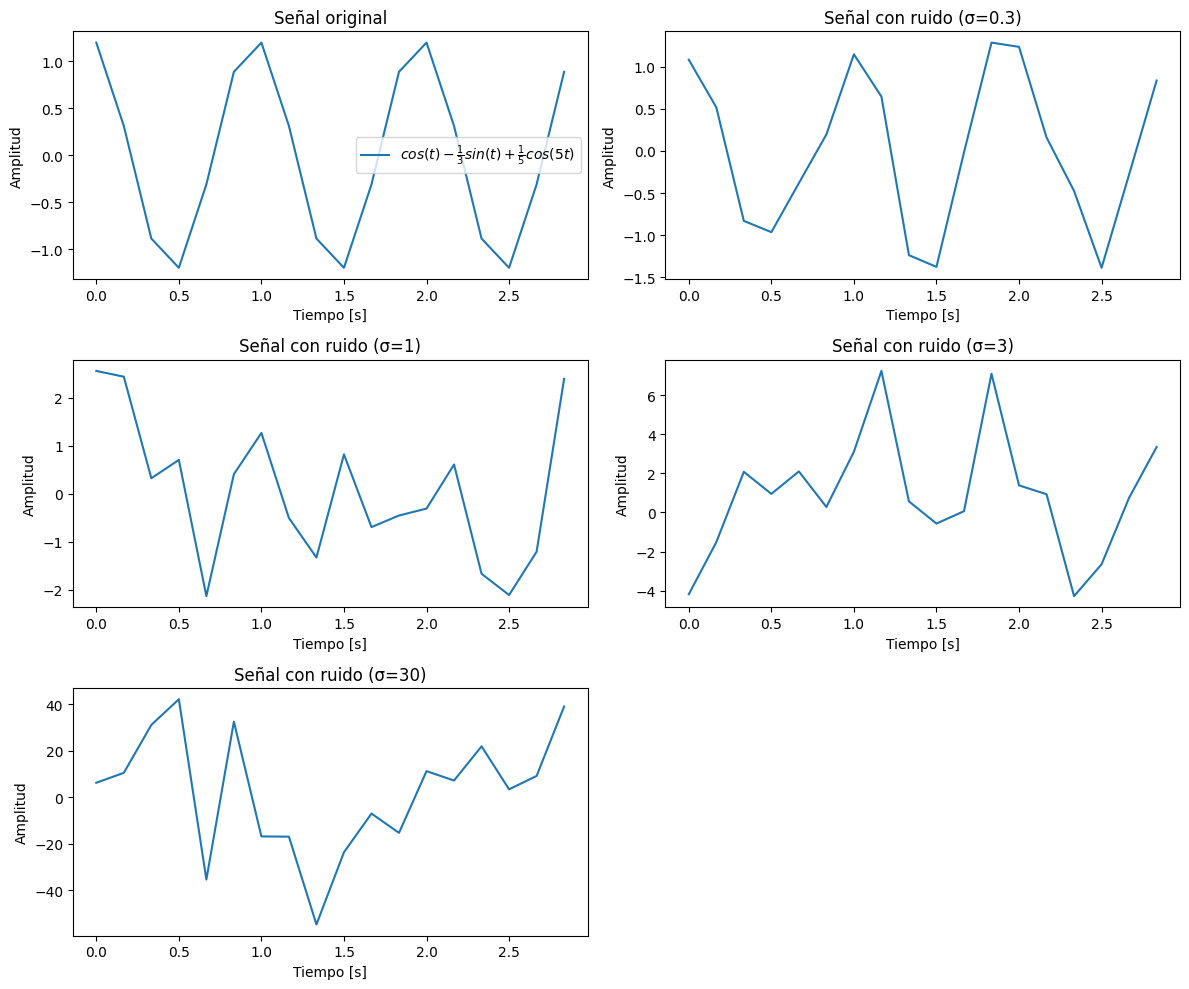

[[ 1.20000000e+00  3.11324865e-01 -8.88675135e-01 -1.20000000e+00
  -3.11324865e-01  8.88675135e-01  1.20000000e+00  3.11324865e-01
  -8.88675135e-01 -1.20000000e+00 -3.11324865e-01  8.88675135e-01
   1.20000000e+00  3.11324865e-01 -8.88675135e-01 -1.20000000e+00
  -3.11324865e-01  8.88675135e-01]
 [ 1.08572533e+00  5.18691523e-01 -8.32109517e-01 -9.65883273e-01
  -3.82674746e-01  1.96997781e-01  1.15009503e+00  6.46978028e-01
  -1.23954201e+00 -1.37909363e+00 -1.68369625e-02  1.28951897e+00
   1.23871539e+00  1.60993656e-01 -4.75607039e-01 -1.38986347e+00
  -2.80206428e-01  8.38255448e-01]
 [ 2.55722433e+00  2.43704156e+00  3.20426287e-01  7.02740142e-01
  -2.13650193e+00  4.05638882e-01  1.26535545e+00 -5.08203946e-01
  -1.33176230e+00  8.16843478e-01 -6.97308248e-01 -4.56048776e-01
  -3.11918164e-01  6.06782842e-01 -1.67044667e+00 -2.11304604e+00
  -1.21203391e+00  2.39210335e+00]
 [-4.18489594e+00 -1.52239052e+00  2.07342999e+00  9.46958978e-01
   2.09471916e+00  2.78511042e-01  3.

In [3]:

noise_levels=[ 0.3,1,3,30]

signal_matrix = np.zeros((len(noise_levels),+1, len(t)))
signal_matrix[0,:]= original_signal



signals_matrix = np.zeros((len(noise_levels) + 1, len(t)))
signals_matrix[0, :] = original_signal

# Añadir ruido y almacenar en la matriz
for i, noise_level in enumerate(noise_levels):
    noisy_signal = original_signal + np.random.normal(0, noise_level, original_signal.shape)
    signals_matrix[i + 1, :] = noisy_signal


plt.figure(figsize=(12, 10))
plt.subplot(3, 2, 1)
plt.plot(t, signals_matrix[0, :])
plt.title("Señal original")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend(["$cos(t) - \\frac{1}{3}sin(t) + \\frac{1}{5}cos(5t)$"])

for i, noise_level in enumerate(noise_levels):
    plt.subplot(3, 2, i + 2)
    plt.plot(t, signals_matrix[i + 1, :])
    plt.title(f"Señal con ruido (σ={noise_level})")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()

print (signals_matrix)
print (signals_matrix.shape)

### Aplica Welch

c:\Users\Usuario\Desktop\Developments\unal\2024-1S\Signals-Theory\.venv\Lib\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1024 is greater than input length  = 18, using nperseg = 18
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Matriz de PSDs:
[[1.21737794e-33 7.57062301e-32 3.87777778e-01 1.55111111e+00
  3.87777778e-01 1.23107344e-31 1.29042062e-31 9.89119576e-33
  9.37821253e-32 1.47302731e-31]
 [1.45187004e-08 2.61976911e-02 3.99539491e-01 1.67594634e+00
  7.73263508e-01 1.24471581e-01 2.22691912e-02 1.66179170e-02
  6.99212823e-03 2.24914037e-04]
 [2.38963071e-01 1.31121234e-01 1.56611579e-03 2.02077114e-01
  7.57715377e-02 1.12667070e+00 4.65444320e-01 1.04730068e-01
  1.06977094e-01 2.66058665e-01]
 [1.38585725e+00 3.66322720e+00 4.51114265e-02 6.12587055e+00
  1.02916808e+01 4.10059965e+00 1.14251795e+00 1.70919630e-01
  3.21234583e+00 2.00754641e+00]
 [2.63070373e+02 7.76678982e+02 5.32421538e+02 1.17284492e+02
  9.67808488e+01 1.42023828e+02 1.25403542e+01 8.71129398e+01
  3.04635291e+02 5.92927079e+01]]


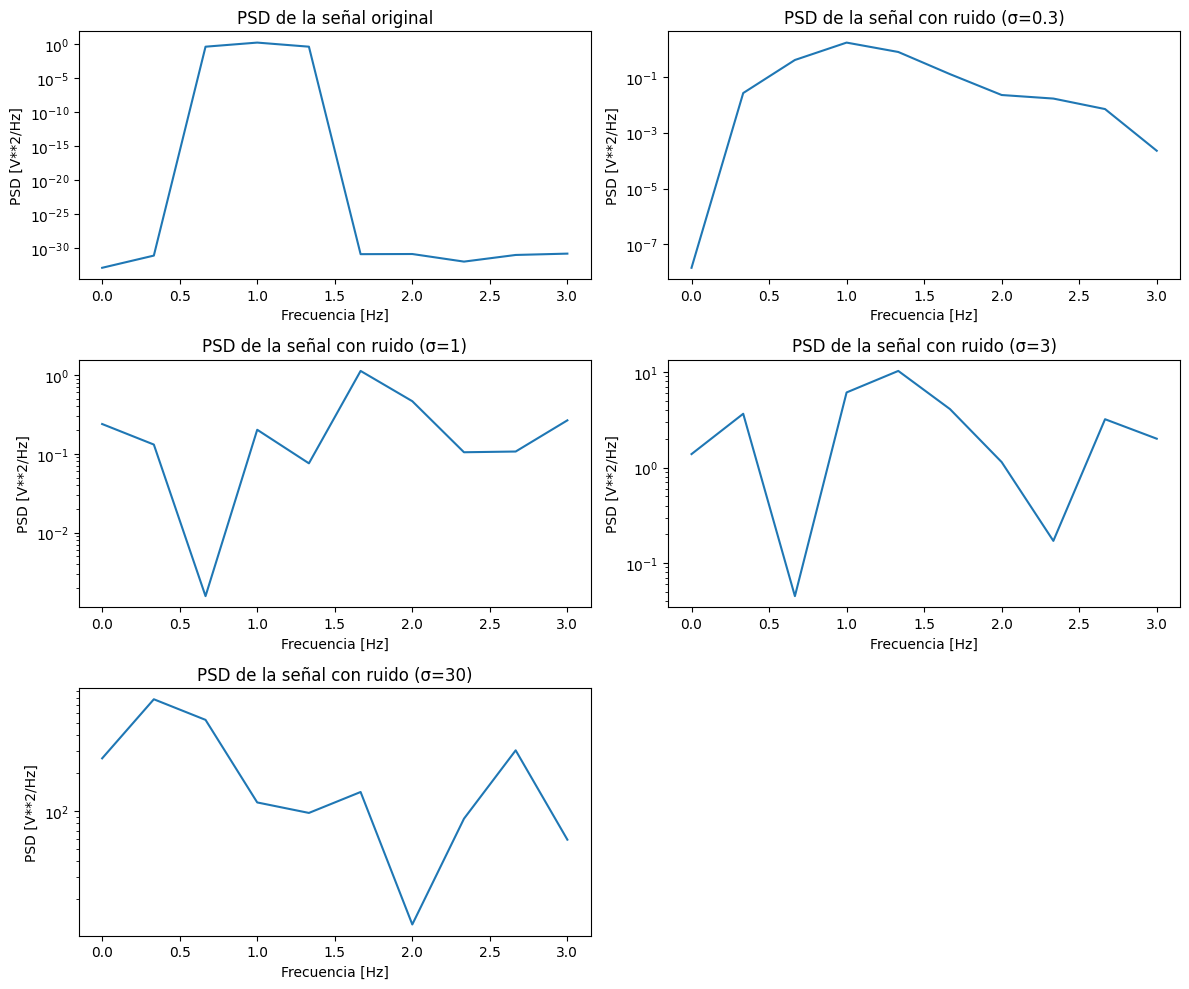

(5, 10)


In [4]:
psd_matrix = []
frequencies = None

for i in range(signals_matrix.shape[0]):
    f, Pxx = welch(signals_matrix[i, :], fs, nperseg=1024)
    if frequencies is None:
        frequencies = f
    psd_matrix.append(Pxx)

psd_matrix = np.array(psd_matrix)

# Imprimir la matriz de PSDs
print("Matriz de PSDs:")
print(psd_matrix)

# Graficar la PSD utilizando el método de Welch
plt.figure(figsize=(12, 10))
for i in range(psd_matrix.shape[0]):
    plt.subplot(3, 2, i + 1)
    plt.semilogy(frequencies, psd_matrix[i, :])
    if i == 0:
        plt.title("PSD de la señal original")
    else:
        plt.title(f"PSD de la señal con ruido (σ={noise_levels[i-1]})")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("PSD [V**2/Hz]")

plt.tight_layout()
plt.show()

print (psd_matrix.shape)

### Separa los datos de entrenamiento


In [5]:
from  sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(signals_matrix, psd_matrix, test_size=0.2, random_state=42)

# Imprimir los conjuntos de entrenamiento y prueba
print("Conjunto de entrenamiento (X_train):")
print(X_train)
print("Conjunto de prueba (X_test):")
print(X_test)
print("Etiquetas de entrenamiento (y_train):")
print(y_train)
print("Etiquetas de prueba (y_test):")
print(y_test)


Conjunto de entrenamiento (X_train):
[[  6.25782912  10.50741035  31.15186431  42.17676065 -35.40305558
   32.53145974 -16.83936553 -16.94163488 -54.72545428 -23.65511507
   -7.00808722 -15.31100234  11.24520814   7.21817452  21.93275725
    3.43142342   9.17119617  39.04122682]
 [  2.55722433   2.43704156   0.32042629   0.70274014  -2.13650193
    0.40563888   1.26535545  -0.50820395  -1.3317623    0.81684348
   -0.69730825  -0.45604878  -0.31191816   0.60678284  -1.67044667
   -2.11304604  -1.21203391   2.39210335]
 [  1.2          0.31132487  -0.88867513  -1.2         -0.31132487
    0.88867513   1.2          0.31132487  -0.88867513  -1.2
   -0.31132487   0.88867513   1.2          0.31132487  -0.88867513
   -1.2         -0.31132487   0.88867513]
 [ -4.18489594  -1.52239052   2.07342999   0.94695898   2.09471916
    0.27851104   3.10041556   7.23225655   0.56198731  -0.57114491
    0.0615189    7.08756842   1.382066     0.92894306  -4.28026266
   -2.65321604   0.74673503   3.34090303

In [6]:

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, y_train.shape[1])
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = NeuralNetwork()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
train_loss = []
val_loss = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    train_loss.append(running_loss / len(train_loader))

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_train_tensor)
        val_loss_epoch = criterion(val_outputs, y_train_tensor).item()
        val_loss.append(val_loss_epoch)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}, Val Loss: {val_loss_epoch}")

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.numpy()
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

# Plot the real vs. predicted PSD for a test signal
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, y_test[0], label='PSD Real')
plt.semilogy(frequencies, y_pred[0], label='PSD Predicha')
plt.title('PSD Real vs. PSD Predicha')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.legend()
plt.show()

# Plot training metrics
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='MAE')  # Note: MAE is not directly tracked here, using loss as a proxy
plt.plot(val_loss, label='Validation MAE')  # Note: MAE is not directly tracked here, using loss as a proxy
plt.title('MAE durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

OSError: [WinError 126] The specified module could not be found. Error loading "c:\Users\Usuario\Desktop\Developments\unal\2024-1S\Signals-Theory\.venv\Lib\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.